# Demo13:  An Introduction to Clustering

Clustering is an unsupervised process.  It takes attributes from observations and tries to identify groups that are similar (or dissimilar) to each other.  Each group of observations with the same label is called a cluster.

There are many types of clustering algorithms.  The one we will be discussing today is called K-Means.  It has been around for decades.  You will be implementing K-Means clustering for one of your assignments.

But for now we are going to go over a canonical clustering exercise.  We will be [data collected about the iris flower]() from the famous biologist (and mathemetician) [RA Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher).

This data set measures the sepals (the green leaves) around the flower petals and the petals themselves.  For each the width and the length are collected.  There are 50 observations from each of three species: {Iris setosa, Iris virginica, Iris versicolor}. We know this.  But we are going to ignore the actual labels for the time being.  In the future when we want to create a model that tries to guess which of the three labels to apply, we will use this information to train that model.  But for now there not something will include in the clustering part and instead use in the final plots to see how well we did.

In [32]:
import pandas as pd
import sklearn.datasets as datasets  # Has the Iris Dataset
import seaborn as sns
import yellowbrick as yb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots
plt.rcParams["figure.figsize"]=(8,6)

## Let's first load and explore our data

Often you will want to spend more time exploring the data than we do in demo or lab.  Understanding the type of data {nominal, ordinal, interval, and ratio} and the internal datatype {string, int, float, Boolean, etc.} is the first step.  We'll then check to see if there are any missing values.  We'll discuss what to do when there are later when we cover "pre-processing".

So let's take a look at our data and see what our attributes look like relative to the (known) label we have.  Remember: in normal clustering exercises you will not have this label.  I'm including it here for discussion.

In [3]:
iris = datasets.load_iris(as_frame=True)
type(iris)
iris.keys()  # A bundle is a fancy dictionary
iris.data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


There are 150 observation.  All are not null.

In [4]:
iris.data.isnull().sum(axis=0)  # If all are zeros, no nan data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris.target.isnull().sum(axis=0)

0

In [6]:
iris.target.unique()  # What are the unique labels?

array([0, 1, 2])

In [7]:
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Let's explore our data

Usually we will want to spend quite a bit of time getting to know our data.  For the purposes of this exercise, we'll look at basic summary information, distributions, and pairwise attribute plots to see if there are any relationships that show up. 

## Now let's plot

Plots will tell us about what this data is actually trying to tell us.  It helps us preview what the data will help us discover about our data.  It acts as a "sanity check" on future observations.  

It is imporant to look at different aspects of your data:
+ What does the distribution of each value look like?
+ What does the correlation of each pair of attributes look like?
+ What if we reduced the data using PCA?  Which attribute(s) are the most important and to what extent to explain the variation in the observations?

## Plot univariate distributions by target

We're going to plot a violin plot for each attribute, separating out the observations with different targets.  This is just to check to see if there is any obvious way to separate out these observations.


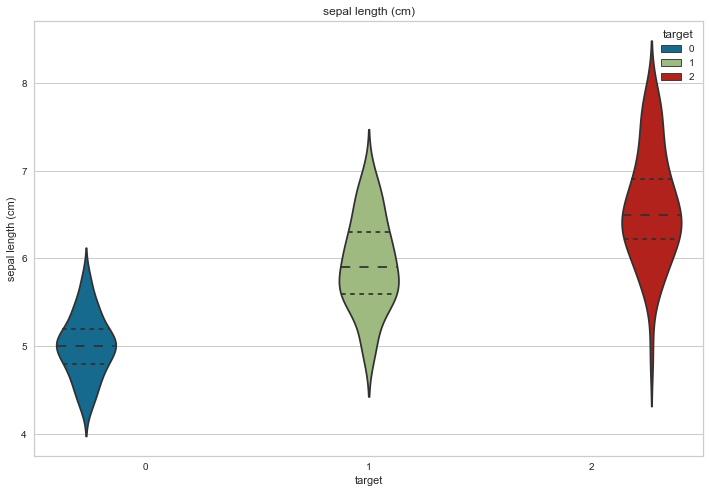

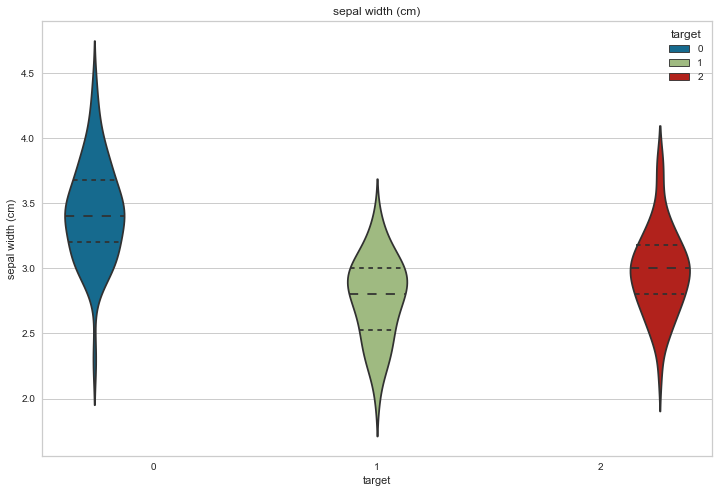

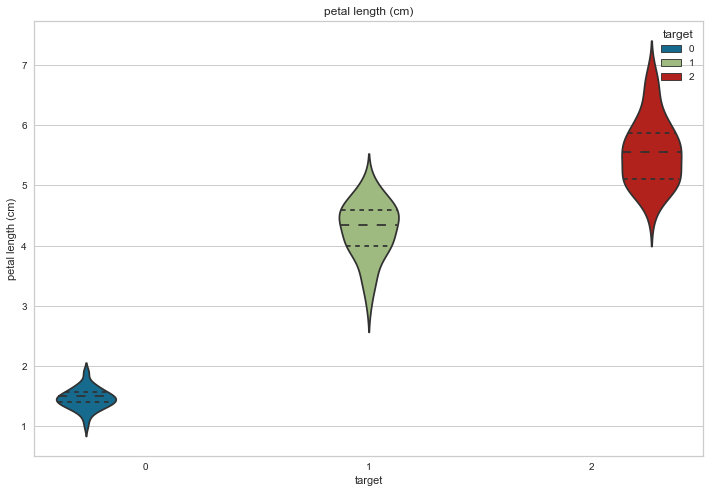

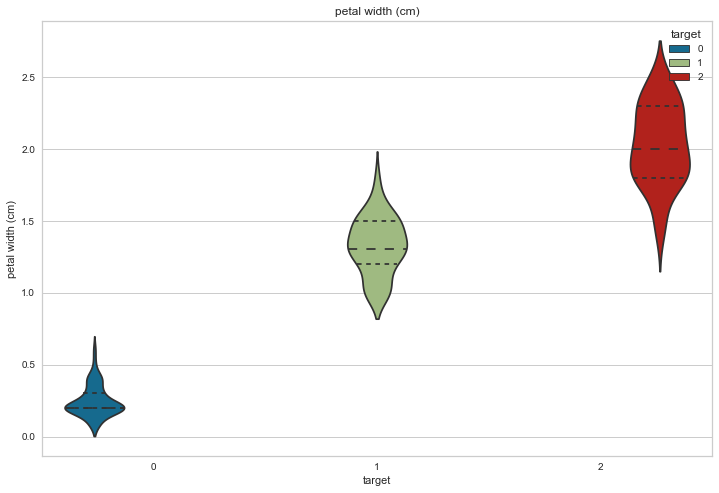

In [8]:
attr_names = iris.data.columns.to_list()
for name in attr_names:
    plt.figure()
    ax = sns.violinplot(data=iris.data, y=name, x=iris.target, hue=iris.target, inner='quartile')
    ax.set_title(name)

## Pairwise correlation

If we can explain all of the correlation in the data (2-way, 3-way, N-way) then we can build a model that describes the data entirely.  Let's look at pairwise correlations.

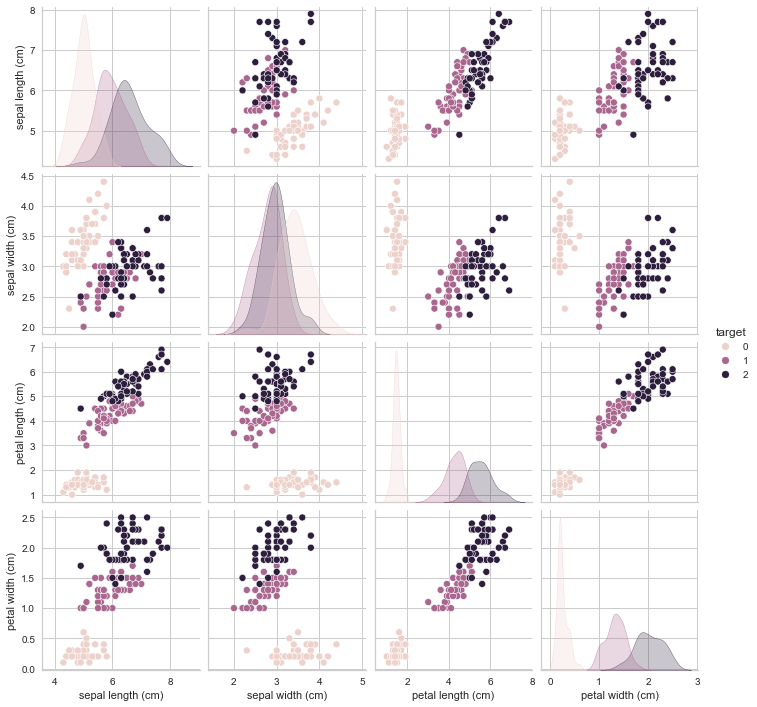

In [9]:
df_combined = pd.concat([iris.data, iris.target], axis=1)
sns.pairplot(data=df_combined, vars=df_combined.columns[:-1], hue='target')

## Reduce dimensions

We're going to use PCA to reduce the number of dimensions in our data to see if we can plot it.  We'll try to reduce the data from 4 to 2 dimensions and then 3.  

PCA is the abbreviation for Principal Component Analysis.  PCA tries to identify axes in the cloud of observations that maximize variance.  These axes are linear combinations of the axes themselves.  We'll see what that means shortly.

There are two ways to go about this.  One is a quick and easy way to plot 2 or 3 dimension PCA plots.  But it does not give us the data that we need to understand what the plot is telling us.  You'll find this in Yellowbrick's PCA and biplot.

We'll do this the manual way just to demonstrate what the different results mean.



In [10]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pca_iris.fit(iris.data)

axis_labels = []
axis_labels = []
for vec in pca_iris.components_:
    label = ' + '.join(map(
        lambda x: str(round(vec[x[0]],2)) + '*' + str(x[1]), 
        enumerate(iris.data.columns.to_list())))
    axis_labels.append(label)

print('Our translation equations for each dimension')
print(axis_labels)
print()
print('Explained variation: ')
print(pca_iris.explained_variance_ratio_)

#pca_iris.components_
#pca_iris.explained_variance_ratio_


Our translation equations for each dimension
['0.36*sepal length (cm) + -0.08*sepal width (cm) + 0.86*petal length (cm) + 0.36*petal width (cm)', '0.66*sepal length (cm) + 0.73*sepal width (cm) + -0.17*petal length (cm) + -0.08*petal width (cm)']

Explained variation: 
[0.92461872 0.05306648]


Text(0.5, 1.0, 'Iris 2D-PCA\nExplained Variance Ratio: $PCA_1$=0.92, $PCA_2$=0.05\n$PCA_1$=0.36*sepal length (cm) + -0.08*sepal width (cm) + 0.86*petal length (cm) + 0.36*petal width (cm)\n$PCA_2$=0.66*sepal length (cm) + 0.73*sepal width (cm) + -0.17*petal length (cm) + -0.08*petal width (cm)')

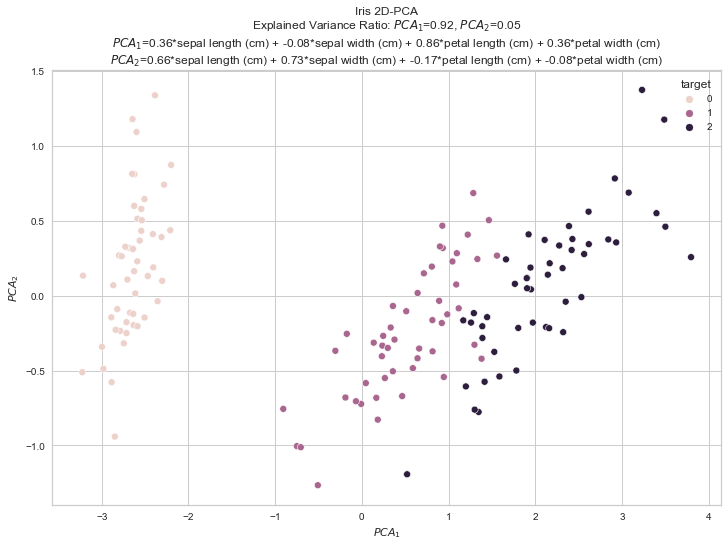

In [11]:
trans_data = pca_iris.transform(iris.data)
ax = sns.scatterplot(x=trans_data[:,0], y=trans_data[:,1], hue=iris.target)
ax.set_xlabel('$PCA_1$')
ax.set_ylabel('$PCA_2$')

title = 'Iris 2D-PCA\nExplained Variance Ratio: $PCA_1$={:0.2f}, $PCA_2$={:0.2f}'.format(*pca_iris.explained_variance_ratio_)
title += '\n$PCA_1$={}\n$PCA_2$={}'.format(*axis_labels)
ax.set_title(title)

## What we've seen shows us that there might be overlap between two of the different Iris species.

Why?  Well the plots above show that although one of the species varies in attributes from the others (mostly due to petal length based on the components).  But the other two (labeled 1 and 2 here) are not separable in a manner that we'll encountered today.

This is a known issue with the data set.

But let's do clustering and see what K-Means can do.

## How did the KMeans clustering operate?

Let's look how it performed one iteration at a time.

In [12]:
from sklearn.cluster import KMeans

In [15]:
cluster = KMeans(n_clusters=3, random_state=103)
cluster.fit(iris.data)


KMeans(n_clusters=3, random_state=103)

In [21]:
cluster.cluster_centers_


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [17]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [18]:
cluster.inertia_

78.85144142614601

/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


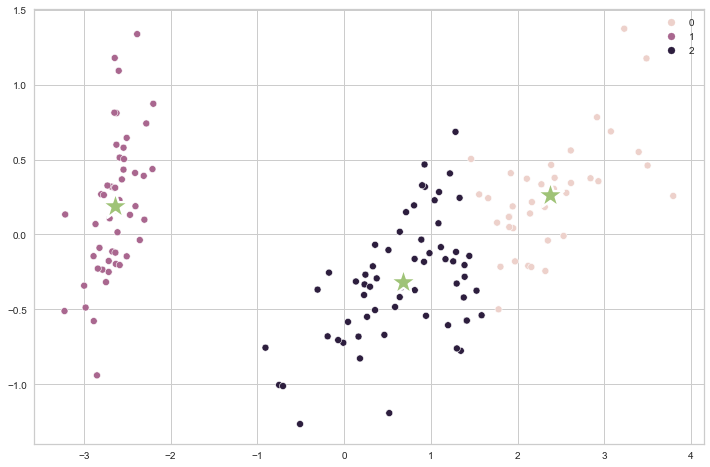

In [27]:
sns.scatterplot(x=trans_data[:,0], y=trans_data[:,1], hue=cluster.labels_);
trans_centers = pca_iris.transform(cluster.cluster_centers_);

sns.scatterplot(x=trans_centers[:,0], y=trans_centers[:,1], color='g', marker='*', s=800);

Text(0, 0.5, 'SSE')

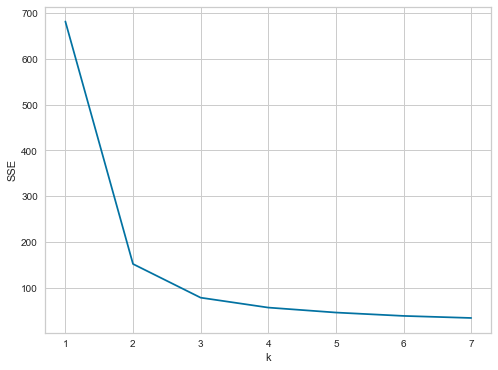

In [33]:
#  Let's collect more data just to see how the clustering
#  performed
sse = {}

for k in range(1,8):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris.data)
    sse[k] = cluster.inertia_

ax = sns.lineplot(x=sse.keys(), y=sse.values())
ax.set_xlabel('k')
ax.set_ylabel('SSE')

/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/ruppmatt/opt/anaconda3/envs/cse801/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


{1: array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
        [6.03877551, 2.83265306, 4.97755102, 1.80408163],
        [6.56875   , 2.94166667, 4.93958333, 1.58541667]]),
 2: array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
        [5.86603774, 2.77169811, 4.63207547, 1.59433962],
        [6.825     , 3.025     , 5.35227273, 1.81818182]]),
 3: array([[5.00784314, 3.40980392, 1.49215686, 0.2627451 ],
        [5.86724138, 2.73793103, 4.4       , 1.43965517],
        [6.84878049, 3.07073171, 5.66829268, 2.02439024]]),
 4: array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615]]),
 5: array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615]])}

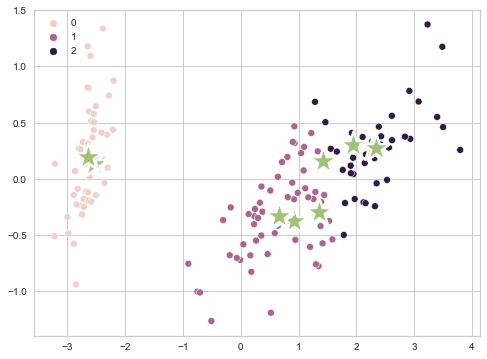

In [40]:
# How did the centroid move over time?
centroids = {}
for it in range(1,6):
    cluster = KMeans(n_clusters=3, random_state=100, n_init=1, max_iter=it)
    cluster.fit(iris.data)
    centroids[it] = cluster.cluster_centers_

sns.scatterplot(x=trans_data[:,0], y=trans_data[:,1], hue=cluster.labels_)

for it, cents in centroids.items():
    trans_centers = pca_iris.transform(cents)
    sns.scatterplot(x=trans_centers[:,0], y=trans_centers[:,1], color='g', marker='*', s=800)

centroids